In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Data prep

In [3]:
y = df['Outcome']
X = df.drop('Outcome',axis=1)

In [4]:
# Instatiating our folds so that we can measure performance on the same basis
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3, random_state=777)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Hyperparameter optimisation

In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1,8+1),'min_samples_leaf':[5,10,15]}

opt_model = GridSearchCV(model,param_grid,cv=skf,scoring='roc_auc')
opt_model.fit(X_train,y_train)
best_model = opt_model.best_estimator_

opt_model.best_params_

{'max_depth': 6, 'min_samples_leaf': 5}

0.8128903028160717

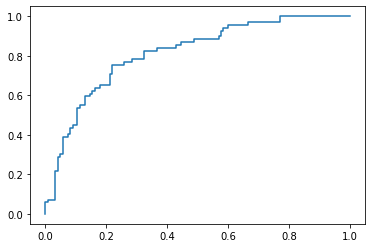

In [8]:
from sklearn.metrics import roc_curve,auc

probas = best_model.predict_proba(X_test)
fpr,tpr,thr = roc_curve(y_test,probas[:,1])
plt.plot(fpr,tpr)
auc(fpr,tpr)

In [9]:
probas

array([[0.51655032, 0.48344968],
       [0.83518358, 0.16481642],
       [0.83597396, 0.16402604],
       [0.7419235 , 0.2580765 ],
       [0.5207623 , 0.4792377 ],
       [0.45368585, 0.54631415],
       [0.98557305, 0.01442695],
       [0.48731335, 0.51268665],
       [0.36180661, 0.63819339],
       [0.46602856, 0.53397144],
       [0.72327316, 0.27672684],
       [0.21417254, 0.78582746],
       [0.56000509, 0.43999491],
       [0.65624714, 0.34375286],
       [0.95018333, 0.04981667],
       [0.6167293 , 0.3832707 ],
       [0.83992482, 0.16007518],
       [0.92670847, 0.07329153],
       [0.41171508, 0.58828492],
       [0.50476695, 0.49523305],
       [0.70706855, 0.29293145],
       [0.88161298, 0.11838702],
       [0.6253254 , 0.3746746 ],
       [0.95889925, 0.04110075],
       [0.44605186, 0.55394814],
       [0.15554149, 0.84445851],
       [0.9007048 , 0.0992952 ],
       [0.95930816, 0.04069184],
       [0.81097461, 0.18902539],
       [0.76769646, 0.23230354],
       [0.

In [10]:
df.shape[0]

768

### Exploring a tree

In [11]:
first_tree = best_model.estimators_[1]
imps = first_tree.feature_importances_
imps

array([0.1221966 , 0.42993854, 0.02495866, 0.00692372, 0.05877994,
       0.19445428, 0.04569806, 0.11705019])

In [12]:
for i in range(100):
    first_tree = best_model.estimators_[i]
    imps = first_tree.feature_importances_
    for j in range(len(imps)):
        if imps[j]==0:
            print('missing var at {} position {}'.format(i,j))


missing var at 11 position 2
missing var at 13 position 0
missing var at 13 position 2
missing var at 16 position 2
missing var at 18 position 0
missing var at 28 position 4
missing var at 41 position 4
missing var at 43 position 6
missing var at 50 position 2
missing var at 54 position 3
missing var at 58 position 2
missing var at 73 position 0
missing var at 74 position 0
missing var at 74 position 4
missing var at 79 position 2
missing var at 81 position 4
missing var at 83 position 0
missing var at 89 position 5
missing var at 92 position 0
missing var at 93 position 0
missing var at 94 position 2


### Sanity check

In [13]:
pd.DataFrame(opt_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.049876,0.003931,0.006255,0.000499,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.857380,0.799904,0.802545,0.820038,0.026530,23
1,0.048561,0.001165,0.006018,0.000220,1,10,"{'max_depth': 1, 'min_samples_leaf': 10}",0.860697,0.800265,0.804000,0.821752,0.027687,22
2,0.048469,0.001450,0.006251,0.000370,1,15,"{'max_depth': 1, 'min_samples_leaf': 15}",0.857735,0.798100,0.795818,0.817325,0.028701,24
3,0.049869,0.000561,0.006103,0.000181,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.860460,0.809644,0.808606,0.826327,0.024234,21
4,0.049991,0.000147,0.006186,0.000201,2,10,"{'max_depth': 2, 'min_samples_leaf': 10}",0.866027,0.812410,0.816364,0.831686,0.024431,19
5,0.052356,0.001506,0.006650,0.000319,2,15,"{'max_depth': 2, 'min_samples_leaf': 15}",0.853234,0.810125,0.817697,0.827080,0.018821,20
6,0.052938,0.000690,0.007354,0.001301,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.865198,0.805796,0.828121,0.833103,0.024534,18
7,0.054570,0.002821,0.006491,0.000077,3,10,"{'max_depth': 3, 'min_samples_leaf': 10}",0.875740,0.814214,0.827152,0.839119,0.026526,13
8,0.052778,0.000537,0.006669,0.000283,3,15,"{'max_depth': 3, 'min_samples_leaf': 15}",0.869936,0.810606,0.827273,0.836012,0.025022,17
9,0.058603,0.003086,0.006848,0.000705,4,5,"{'max_depth': 4, 'min_samples_leaf': 5}",0.872542,0.811568,0.828606,0.837648,0.025726,14


//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


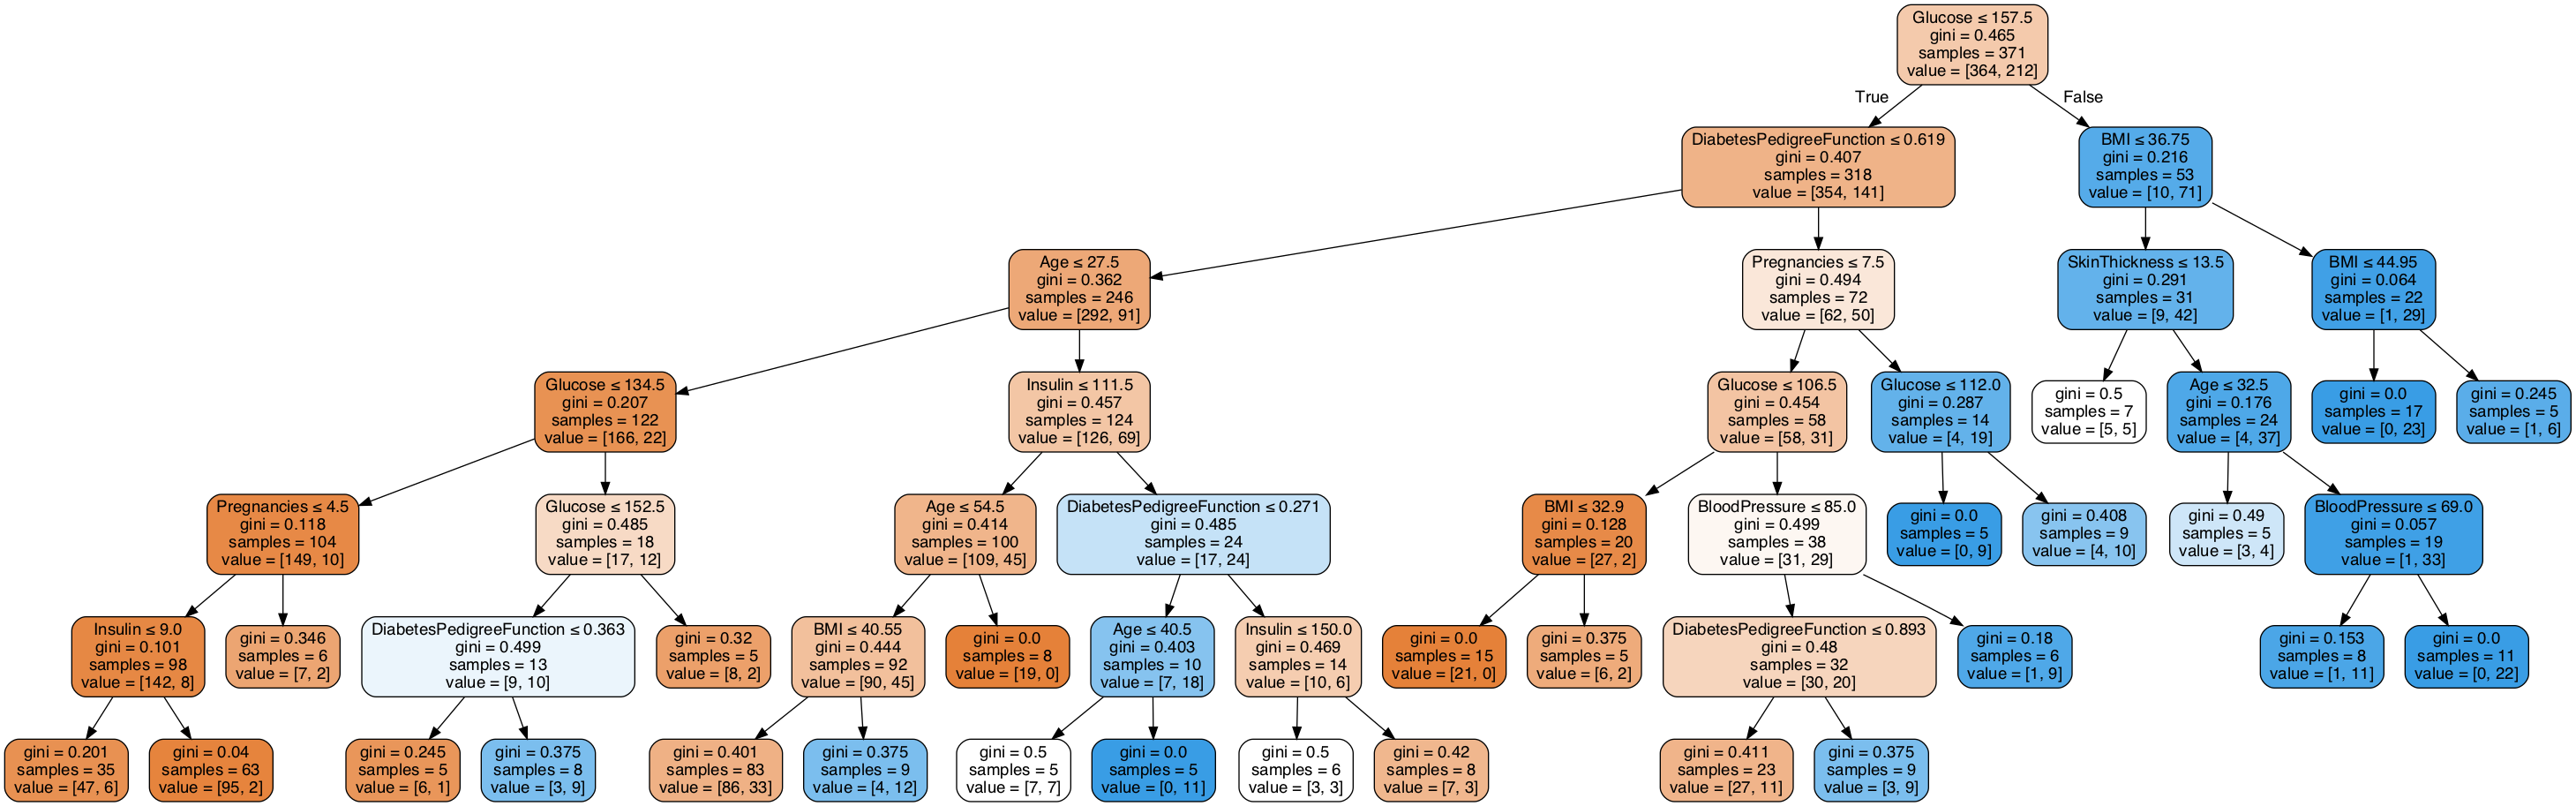

In [14]:
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(first_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Importances

In [15]:
list(best_model.feature_importances_)

[0.061022630212767034,
 0.3599546465862152,
 0.048816189227448514,
 0.05558890397385984,
 0.06597737913562003,
 0.1568809820695444,
 0.08385409238537914,
 0.16790517640916586]

In [16]:
list(X.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']